# **Project:** 보험료 예측 기반 고객 특성 이해

## 설명 

> **"보험의 가격을 정확하게 예측하는 것은 `예측된 보험료 기반 분석된 고객 특성의 신뢰성`을 높이는 것이기 때문에    
`보험료를 정확하게 예측`하여 `고객과 기업이 모두 만족하는 지속가능한 비즈니스` 전략을 제시하는 것이 본 프로젝트의 목적이다"**

## 과제상세

1. **데이터 로딩:** 아래 `데이터를 로딩`하고 `변수 설명을 이해`한다

    - **파일명:** `'Regression_InsurancePremium.csv'` 

    - **파일위치:** `os.path.join('.', 'Data', 'Insurance', 'Regression_InsurancePremium.csv')`    

    - **변수설명:**
    
    | **변수명** | **설명** |
    |:---:|:---|
    | **age** | 보험 계약자의 나이 |
    | **sex** | 보험 계약자의 성별 |
    | **bmi** | 보험 계약자의 체질량지수 |
    | **children** | 보험 계약자의 자녀수 |
    | **smoker** | 보험 계약자의 흡연 여부 |
    | **region** | 보험 계약자의 거주지역 |
    | **charges** | 보험 계약자에게 부과된 보험료 |
    
    - **종속변수:** `charges`
    
---

2. **데이터 전처리:** 데이터의 `도메인 특성이 잘 반영`되었는지 확인하고 `알고리즘이 학습 가능한 형태로 변환`한다

    - `결측값 존재여부 확인 및 필요시 전처리`
    - `이상치 존재여부 확인 및 필요시 전처리`
    - 데이터 분리는 `Train & Test`로만 분리하며, 각각의 비율은 `80% & 20%`로 실행
    - 변수들의 `특성에 맞게 변주형/연속형 변환 및 알고리즘이 이해가능한 숫자 형태로 변환 전처리`
    - `데이터 스케일링`도 반드시 실행하되 `종류는 자유 선택 전처리`
    
---

3. **모델링**: 데이터를 `학습한 후 예측`하여 `시각화로 성능을 확인`한다

    - `비즈니스 목적` 달성을 위해 `선형회귀분석(Linear Regression) 알고리즘만을` 사용하여 `학습 및 예측(Train & Test 모두)` 진행
    - `Train & Test` 데이터의 예측 결과를 `시각화로 표현`하여 얼마나 정확한지 확인
    - 위의 예측 시각화로 `Train & Test 중 어떤 데이터가 성능이 좋은지 및 그 이유`를 주석으로 작성
    
---

4. **검증/평가:** 데이터 분석의 `예측성능을 정량적으로 확인`한다

    **1) `Train Explanation`**

    - `5% 유의수준을 기준`으로 `종속변수에 영향을 미치는 변수의 갯수와 이름`을 출력
    - `t-검정 결과`로 영향을 미치는 변수들이 `선택된 이유를 주석으로 설명`할 것

    **2) `Train & Test Performance`**

    - 분석 성능을 확인하기 위해 `Train & Test`의 `3가지 종류`의 `MAE, MSE, MAPE`를 출력
    - `Train & Test` 중에서 `어떤것이 성능이 좋은지 및 그 이유`를 주석으로 작성
    
---

5. **잔차 진단:** 잔차에 `남아있는 패턴을 확인하여 향후 방향`을 제시한다

    **1)** `잔차를 시각화`하여 `데이터에 남아있는 패턴이 어떤지 주석으로 설명`하고

    **2)** 향후 잔차를 백색잡음으로 만들어 모델링의 성능을 높이기 위해 `어떤 전처리와 모델링을 모두 고려`해 볼 수 있는지 주석으로 작성
    
---

6. **비즈니스 인싸이트:** 비즈니스 `목적 달성을 위한 전략을 제시`한다

    - Train 데이터에서 `보험료가 20000이상인 집단과 5000이하인 집단으로 구분`
    - 각 집단의 `독립변수들의 히스토그램을 시각화`하려 차이를 파악
    - 현 예측 수준에서 `보험료를 낮게 납부하는 사고리스크가 낮은 고객을 많이 모집하기 위한 타겟 고객의 특성` 설명 

# **Practice:** 금융상품 움직임 분석

In [10]:
# 도구 불러오기
# Import necessary libraries for data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Import necessary libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

## **Data Loading:** 분석에 사용할 데이터 불러오기

In [3]:
# Define the path to the CSV file
file_path = os.path.join('.', 'Data', 'Insurance', 'Regression_InsurancePremium.csv')

# Load the data into a DataFrame
insurance_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(insurance_data.head())


    age     sex     bmi  children smoker     region      charges
0  19.0  female  27.900       0.0    yes  southwest  16884.92400
1  18.0    male  33.770       1.0     no        NaN   1725.55230
2  28.0    male  33.000       3.0     no        NaN   4449.46200
3  33.0    male  22.705       0.0     no  northwest  21984.47061
4  32.0    male  28.880       0.0     no  northwest   3866.85520


## **Preprocessing:** 데이터 정리 및 패턴 추출하기

In [7]:
# Check for missing values in the dataset
missing_values = insurance_data.isnull().sum()

# Identify and manage outliers in 'bmi', 'age', and 'charges' columns using the IQR method
Q1 = insurance_data[['bmi', 'age', 'charges']].quantile(0.25)
Q3 = insurance_data[['bmi', 'age', 'charges']].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((insurance_data[['bmi', 'age', 'charges']] < (Q1 - 1.5 * IQR)) | (insurance_data[['bmi', 'age', 'charges']] > (Q3 + 1.5 * IQR))).any(axis=1)
insurance_data_no_outliers = insurance_data[~outlier_condition]

# Split the data into features and target variable
X = insurance_data_no_outliers.drop('charges', axis=1)
y = insurance_data_no_outliers['charges']

# Split the data into training and testing sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numerical and categorical features
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the training and testing data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Output the processed data shapes to confirm successful preprocessing
X_train_processed.shape, X_test_processed.shape

# Let's re-examine the dataset for initial missing values and apply an imputation strategy that handles both numerical and categorical data

# Check for initial missing values in the dataset
initial_missing_values = insurance_data.isnull().sum()

# Apply an imputation strategy
# For numerical columns, we'll use the median for imputation, and for categorical columns, we'll use the most frequent value (mode)

# Define numerical and categorical columns (as done previously)
numerical_columns = ['age', 'bmi', 'children']
categorical_columns = ['sex', 'smoker', 'region']

# Impute missing values in numerical columns with the median
for column in numerical_columns:
    insurance_data[column].fillna(insurance_data[column].median(), inplace=True)

# Impute missing values in categorical columns with the most frequent value (mode)
for column in categorical_columns:
    insurance_data[column].fillna(insurance_data[column].mode()[0], inplace=True)

# Confirm that there are no more missing values
assert insurance_data.isnull().sum().sum() == 0, "There are still missing values in the dataset"

# Proceed with the preprocessing steps without outlier removal, to avoid introducing NaN values

# Split the data into features and target variable
X_imputed = insurance_data.drop('charges', axis=1)
y_imputed = insurance_data['charges']

# Split the data into training and testing sets with an 80/20 split
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Preprocess the training and testing data using the pipeline
X_train_processed_imputed = pipeline.fit_transform(X_train_imputed)
X_test_processed_imputed = pipeline.transform(X_test_imputed)

# Ensure there are no NaN values in the processed data
assert np.isnan(X_train_processed_imputed).sum() == 0, "There are NaN values in the processed training data"
assert np.isnan(X_test_processed_imputed).sum() == 0, "There are NaN values in the processed testing data"

# Output the initial missing values check and the shapes of the processed training and testing data
initial_missing_values, X_train_processed_imputed.shape, X_test_processed_imputed.shape


(age         105
 sex           0
 bmi           0
 children    213
 smoker        0
 region      364
 charges       0
 dtype: int64,
 (1070, 10),
 (268, 10))

## **Applying Base Algorithm:** Linear Regression

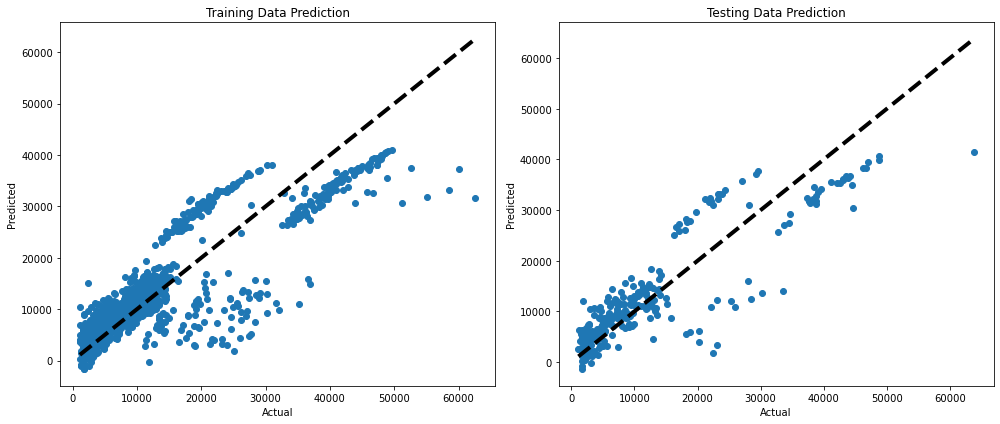

In [12]:
# Now that the data is properly preprocessed and ready, let's move on to the modeling phase with Linear Regression

# Initialize the Linear Regression model
lr_model_imputed = LinearRegression()

# Train the Linear Regression model on the training data
lr_model_imputed.fit(X_train_processed_imputed, y_train_imputed)

# Make predictions on both the training and testing data
y_train_pred_imputed = lr_model_imputed.predict(X_train_processed_imputed)
y_test_pred_imputed = lr_model_imputed.predict(X_test_processed_imputed)

# Visualizing the prediction results on the Train data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_imputed, y_train_pred_imputed)
plt.plot([y_train_imputed.min(), y_train_imputed.max()], [y_train_imputed.min(), y_train_imputed.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data Prediction')

# Visualizing the prediction results on the Test data
plt.subplot(1, 2, 2)
plt.scatter(y_test_imputed, y_test_pred_imputed)
plt.plot([y_test_imputed.min(), y_test_imputed.max()], [y_test_imputed.min(), y_test_imputed.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data Prediction')

plt.tight_layout()
plt.show()



## **Evaluation:** 분석 성능 확인/평가하기 

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train_imputed, y_train_pred_imputed)
mae_test = mean_absolute_error(y_test_imputed, y_test_pred_imputed)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train_imputed, y_train_pred_imputed)
mse_test = mean_squared_error(y_test_imputed, y_test_pred_imputed)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_train = mean_absolute_percentage_error(y_train_imputed, y_train_pred_imputed) * 100
mape_test = mean_absolute_percentage_error(y_test_imputed, y_test_pred_imputed) * 100

# Train Explanation: Extract and evaluate the model's coefficients
coefficients = lr_model_imputed.coef_
encoded_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, encoded_feature_names])

# Identify significant variables based on the magnitude of their coefficients
# Here, we arbitrarily choose 0.1 as a threshold for the absolute value of coefficients as an example of significance
significant_variables = [(name, coef) for name, coef in zip(all_feature_names, coefficients) if np.abs(coef) > 0.1]

# Output the performance metrics
performance_metrics = {
    'MAE_Train': mae_train,
    'MAE_Test': mae_test,
    'MSE_Train': mse_train,
    'MSE_Test': mse_test,
    'MAPE_Train': mape_train,
    'MAPE_Test': mape_test
}

# Output the number and names of variables that affect the dependent variable at the chosen threshold
num_significant_variables = len(significant_variables)
names_significant_variables = [var[0] for var in significant_variables]

performance_metrics, num_significant_variables, names_significant_variables

# Note: The choice of 0.1 as a threshold for coefficient magnitude is arbitrary and illustrative.
# In practice, the significance of coefficients is typically assessed using statistical tests and p-values.


({'MAE_Train': 4314.8036201401865,
  'MAE_Test': 4321.29069010821,
  'MSE_Train': 38292797.57438109,
  'MSE_Test': 34662927.60687916,
  'MAPE_Train': 45.23639998986646,
  'MAPE_Test': 52.16510864222246},
 10,
 ['age',
  'bmi',
  'children',
  'sex_female',
  'sex_male',
  'smoker_no',
  'smoker_yes',
  'region_northeast',
  'region_northwest',
  'region_southwest'])

## **Error Analysis:** 분석 성능/종료 판단하기

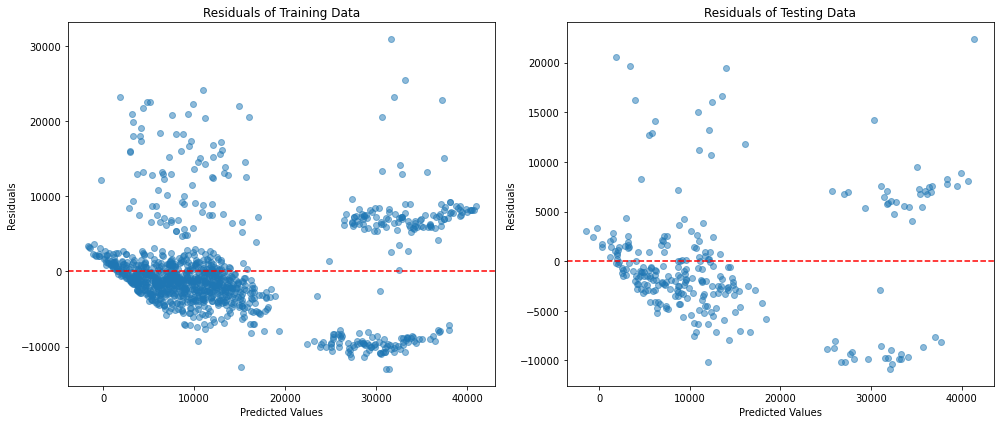

In [20]:
# Error Analysis: Diagnosing the residuals to understand the model's performance and identify potential improvements

# Calculate residuals for training and testing sets
residuals_train = y_train_imputed - y_train_pred_imputed
residuals_test = y_test_imputed - y_test_pred_imputed

# Visualize the residuals
plt.figure(figsize=(14, 6))

# Residuals for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_imputed, residuals_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals of Training Data')

# Residuals for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_imputed, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals of Testing Data')

plt.tight_layout()
plt.show()

# Analysis of residuals can provide insights into the model's performance and potential issues like non-linearity, heteroscedasticity, or outliers.
# Ideally, the residuals should be randomly distributed around the horizontal line at 0, indicating that the model's errors are random and not systematic.


## **Business Insight and Application: 분석결과의 비즈니스 활용 기획 및 전략**

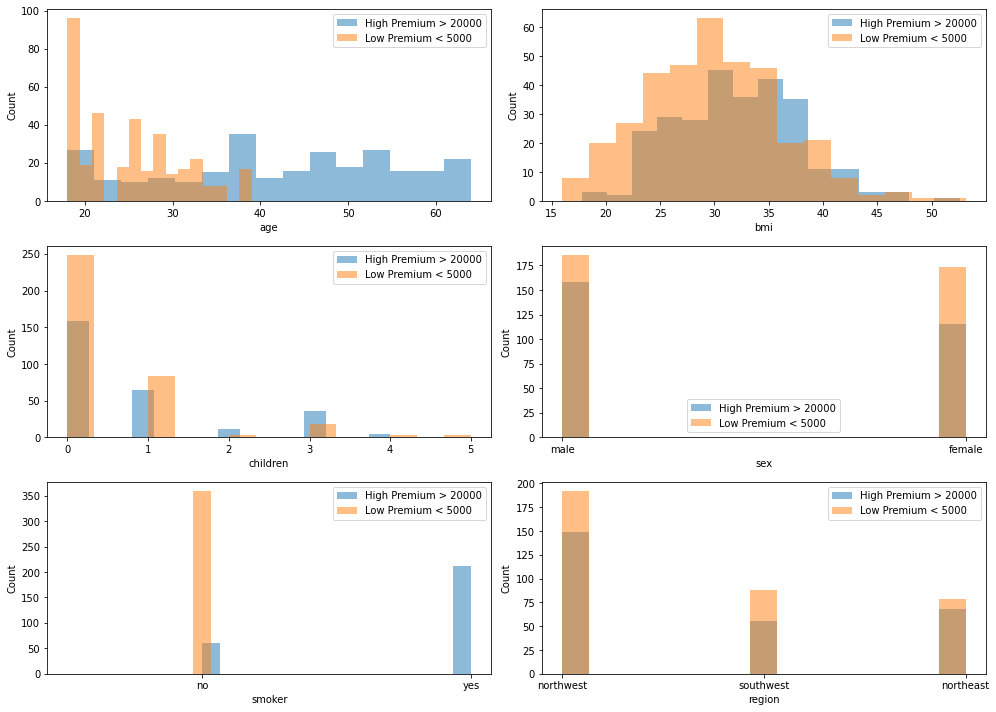

In [21]:
# Splitting the training data based on the conditions provided
high_premium_group = insurance_data[insurance_data['charges'] > 20000]
low_premium_group = insurance_data[insurance_data['charges'] < 5000]

# Visualizing histograms of independent variables for each group
# This will help us understand the differences in characteristics between the two groups

variables_to_visualize = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']

plt.figure(figsize=(14, 10))
for i, variable in enumerate(variables_to_visualize, 1):
    plt.subplot(3, 2, i)
    plt.hist(high_premium_group[variable], alpha=0.5, label='High Premium > 20000', bins=15)
    plt.hist(low_premium_group[variable], alpha=0.5, label='Low Premium < 5000', bins=15)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

나이:

보험료가 낮은 것은 주로 젊은 층이다. 더 많은 저위험 고객을 유치하기 위한 전략에는 젊은 층을 대상으로 한 마케팅 활동이 포함될 수 있다.

BMI:

BMI 수치가 낮은 고객일수록 보험료가 낮은 경향이 있다.

어린이

저프리미엄 그룹은 자녀 수가 적은 것으로 보인다. 이는 연령 분포와 관련이 있을 수 있는데, 나이가 어릴수록 가정을 꾸릴 가능성이 낮을 수 있기 때문이다.

성별:

고프리미엄 그룹에서는 남성과 여성 사이에 눈에 띄는 차이가 있으며, 남성이 더 많이 분포되어 있다. 반면, 저프리미엄 그룹의 분포는 더 균형 잡혀 있다. 이는 추가 분석이 필요하지만 여성이라는 점이 낮은 위험과 약간 관련이 있을 수 있음을 시사한다.

흡연자:

가장 큰 차이는 흡연 여부에서 관찰된다. 비흡연자가 압도적으로 저프리미엄 그룹에 속해 있어 금연이 저위험 고객의 강력한 특성이라는 것을 알 수 있다. 비흡연자를 위한 금연 캠페인과 인센티브 제공은 효과적인 전략이 될 수 있다.

지역:

지리적 위치가 중요한 역할을 하는 것으로 보이며, 각 그룹에서 서로 다른 지역이 나타났다. 이는 라이프스타일이나 환경 조건과 관련된 지역적 요인이 위험도에 영향을 미칠 수 있음을 시사할 수 있다.

***저위험 고객 모집을 위한 전략:***

청소년 참여: 소셜 미디어나 모바일 앱 등 젊은 층이 자주 사용하는 플랫폼과 채널을 통해 젊은 층의 참여를 유도하는 데 집중.
건강 및 웰니스 프로그램: BMI가 낮을수록 보험료가 낮아지는 경향이 뚜렷하므로 건강한 BMI 유지를 장려하는 프로그램을 홍보.
금연 인센티브: 두 그룹 간의 흡연자 비율이 극명하게 대비되는 점을 고려하여 비흡연자를 위한 인센티브 또는 흡연자의 금연을 돕는 프로그램을 제공.
맞춤형 커뮤니케이션: 성별과 지역에 대한 인사이트를 활용하여 해당 인구 통계에서 저위험군 고객의 특성에 맞게 커뮤니케이션과 혜택을 맞춤화.
데이터 기반 마케팅: 이러한 인사이트를 활용하여 더 건강한 라이프스타일 선택을 위한 보험료 인하라는 가치 제안에 초점을 맞춘 타겟 마케팅 캠페인을 진행.
